## Discriminantes Logísticos

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pickle

### Classificação binária: Dados Sintéticos binClassData.p

In [235]:
D = pickle.load(open("binClassData.p", "rb"))

In [236]:
D.keys()

dict_keys(['Xtest', 'trueClassTest', 'Xtrain', 'trueClassTrain'])

In [237]:
X1 = D['Xtrain']
X2 = D['Xtest']
y1 = D['trueClassTrain']
y2 = D['trueClassTest']

In [238]:
print("X1 shape: ",X1.shape)
print("X2 shape: ",X2.shape)
print("y1 shape: ",y1.shape)
print("y2 shape: ",y2.shape)

X1 shape:  (2, 100)
X2 shape:  (2, 50)
y1 shape:  (100,)
y2 shape:  (50,)


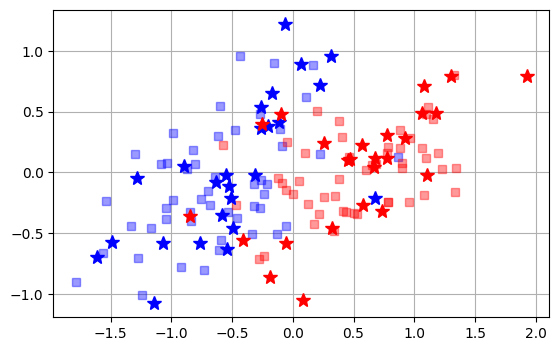

In [239]:
plt.plot(X1[0,y1==0],X1[1,y1==0],'sb', X1[0,y1==1],X1[1,y1==1],'sr', alpha=.4)
plt.plot(X2[0,y2==0],X2[1,y2==0],'*b', X2[0,y2==1],X2[1,y2==1],'*r', ms=10)
plt.axis('scaled')
plt.grid(True)

#### Regularizador L2

In [240]:
dl = LogisticRegression(penalty='l2', C=0.1, random_state=42, solver='saga').fit(X1.T, y1)
print("Training accuracy: ", dl.score(X1.T, y1))
print("Test accuracy: ", dl.score(X2.T, y2))

Training accuracy:  0.87
Test accuracy:  0.82


In [241]:
w = dl.coef_.squeeze() #squeeze removes dimensions of size 1
w0 = dl.intercept_
print("w: ", w)
print("w0: ", w0)

w:  [ 1.28535287 -0.03823838]
w0:  [0.0583961]


##### Fronteira de Decisão


x1:  [-2  2]
x2:  [-65.70125064  68.75556908]


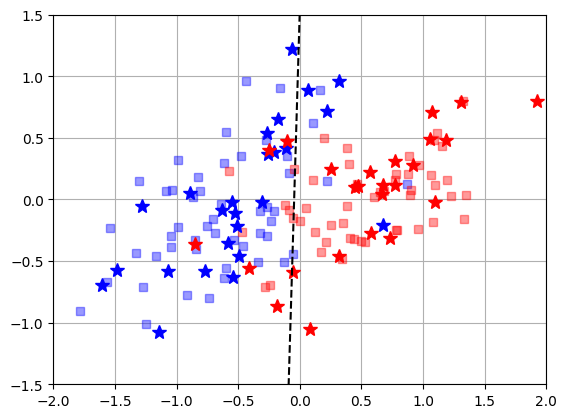

In [242]:
x1 = np.array([-2,2])
x2 = -1/w[1]*(w0 + w[0]*x1)
print("\nx1: ", x1)
print("x2: ", x2)
plt.plot(X1[0,y1==0],X1[1,y1==0],'sb', X1[0,y1==1],X1[1,y1==1],'sr', alpha=.4)
plt.plot(X2[0,y2==0],X2[1,y2==0],'*b', X2[0,y2==1],X2[1,y2==1],'*r', ms=10)
plt.plot(x1,x2,'--k')
plt.axis('scaled')
plt.axis([-2,2,-1.5,1.5])
plt.grid(True)

#### Regularizador L1

In [243]:
dl = LogisticRegression(penalty='l1', C=0.1, random_state=42, solver='saga').fit(X1.T, y1)
print("Training accuracy: ", dl.score(X1.T, y1))
print("Test accuracy: ", dl.score(X2.T, y2))

Training accuracy:  0.89
Test accuracy:  0.8


w:  [1.60442774 0.        ]
w0:  [0.0766121]

x1:  [-2  2]
x2:  [ inf -inf]


C:\Users\Vera Pedro\AppData\Local\Temp\ipykernel_5188\939051938.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  x2 = -1/w[1]*(w0 + w[0]*x1)


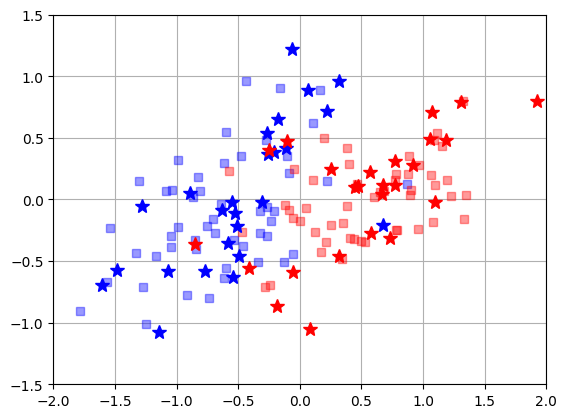

In [244]:
w = dl.coef_.squeeze() #squeeze removes dimensions of size 1
w0 = dl.intercept_
print("w: ", w)
print("w0: ", w0)

x1 = np.array([-2,2])
x2 = -1/w[1]*(w0 + w[0]*x1)
print("\nx1: ", x1)
print("x2: ", x2)
plt.plot(X1[0,y1==0],X1[1,y1==0],'sb', X1[0,y1==1],X1[1,y1==1],'sr', alpha=.4)
plt.plot(X2[0,y2==0],X2[1,y2==0],'*b', X2[0,y2==1],X2[1,y2==1],'*r', ms=10)
plt.plot(x1,x2,'--k')
plt.axis('scaled')
plt.axis([-2,2,-1.5,1.5])
plt.grid(True)

Comentários <br>
W2 vai ser igual a 0 o que significa que quando se for calcular x2 este vai ser infinito, assim a fronteira de decisão não vai ser posivel de calcular sendo esta na vertical.<br>
Para se obter uma fronteira de decisão era necessário aumentar o valor de C. Quanto mais proximo de 0 este valor tende a ficar mais na vertical, caso contrário fica mais obliquo.

### Classificação binária: Dataset Breast Cancer

In [245]:
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
D = dt.load_breast_cancer()
D.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [246]:
X = D.data
y = D.target
fn = D.feature_names
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [247]:
X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3)
dl = LogisticRegression(penalty='l2', C=1, random_state=42, solver='saga',max_iter=5000).fit(X1, y1)
print("Training accuracy: ", dl.score(X1, y1))
print("Test accuracy: ", dl.score(X2, y2))

Training accuracy:  0.9340369393139841
Test accuracy:  0.9


In [248]:
w = dl.coef_.squeeze()
print("w: ", w)
w0 = dl.intercept_
print("w0: ", w0)

w:  [ 2.12475617e-02 -1.30467923e-02  1.01248314e-01  1.91943042e-02
  8.70786355e-05 -7.13210200e-04 -1.28290707e-03 -4.98362062e-04
  1.48286902e-04  1.09006867e-04  5.00756311e-04 -1.58867998e-03
 -8.00954664e-04 -1.60380024e-02 -3.69194493e-06 -2.36061244e-04
 -3.03182081e-04 -6.53913845e-05 -1.62151269e-05 -1.60903160e-05
  2.30164578e-02 -3.72015313e-02  8.01371147e-02 -3.51956478e-02
 -1.46706352e-05 -2.81887150e-03 -4.08267917e-03 -9.95756442e-04
 -9.25483839e-05 -1.11697757e-04]
w0:  [0.00308966]


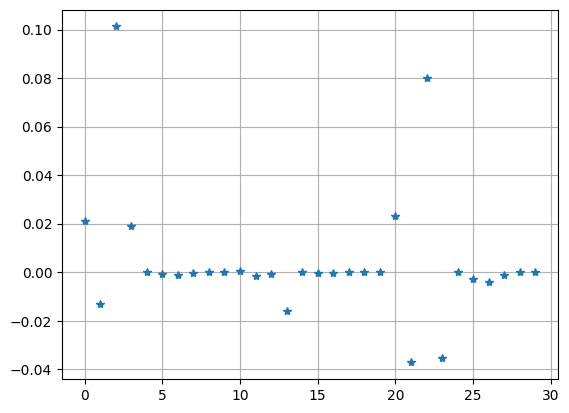

Valores = 0: 0


In [249]:
plt.plot(w,'*')
plt.grid(True)
plt.show()
print("Valores = 0:", np.sum(w==0))

Comentários<br>
Existem valores dos coeficentes que  se apresentam a volta de zero e outras que se encontram fora de 0, mas nenhum é igual a 0

Training accuracy:  0.9340369393139841
Test accuracy:  0.9
w:  [ 2.04629908e-02 -1.26047571e-02  1.00625979e-01  1.91955958e-02
  0.00000000e+00 -1.55568039e-05 -5.23694125e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.29142563e-03
 -6.08502570e-04 -1.56067266e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22087026e-02 -3.61112320e-02  7.97957503e-02 -3.51143033e-02
  0.00000000e+00 -2.04246455e-03 -3.28683404e-03 -2.40347457e-04
  0.00000000e+00  0.00000000e+00]
w0:  [0.00307916]


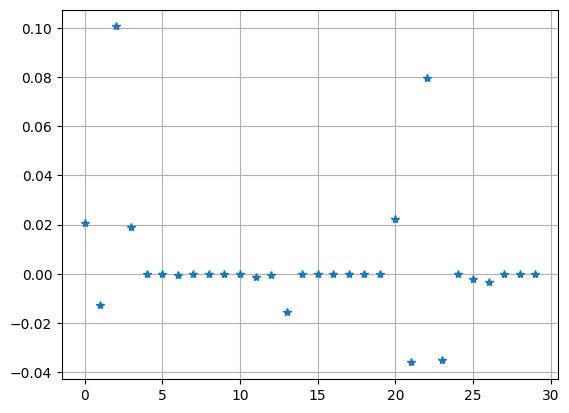

Valores = 0: 14


In [250]:
dl = LogisticRegression(penalty='l1', C=1, random_state=42, solver='saga',max_iter=5000).fit(X1, y1)
print("Training accuracy: ", dl.score(X1, y1))
print("Test accuracy: ", dl.score(X2, y2))
w = dl.coef_.squeeze()
print("w: ", w)
w0 = dl.intercept_
print("w0: ", w0)
plt.plot(w,'*')
plt.grid(True)
plt.show()
print("Valores = 0:", np.sum(w==0))

In [251]:
print(fn[w!=0])
print(np.argwhere(w!=0).squeeze())

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'texture error' 'perimeter error'
 'area error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst compactness' 'worst concavity' 'worst concave points']
[ 0  1  2  3  5  6 11 12 13 20 21 22 23 25 26 27]


Comentários <br>
Ao utilizarmos o L1 verifica-se que já obtivemos dados com valores iguais a 0, 13 como é demonstrado em cima.Isto serve para mostrar que com a uitlização de L1 é possivel detetar valores que servirão para teste no entanto, é necessário fazer  por tentaaiva e erro a obtenção de valores que sejam rigoross para a classificação pretendida.

### Classificação multi-classe: Dataset Iris

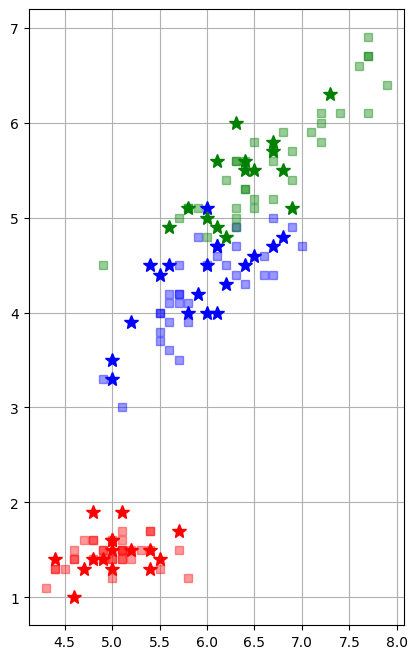

In [252]:
from sklearn.linear_model import LogisticRegression
D = dt.load_iris()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3, shuffle=True, random_state=0)

plt.figure(figsize=(5,8))
plt.plot(X1[y1==0,0],X1[y1==0,2],'sr', X1[y1==1,0],X1[y1==1,2],'sb', X1[y1==2,0],X1[y1==2,2],'sg', alpha=.4)
plt.plot(X2[y2==0,0],X2[y2==0,2],'*r', X2[y2==1,0],X2[y2==1,2],'*b', X2[y2==2,0],X2[y2==2,2],'*g', ms=10)
plt.axis('scaled')
plt.grid(True)

In [253]:
dl = LogisticRegression(penalty='l1', C=0.1, solver='liblinear').fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste): ',np.sum(y2!=y2e))
print('-----------------')
print(dl.coef_)

Número de erros (teste):  19
-----------------
[[ 0.00000000e+00  8.78294381e-01 -1.09190523e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.52415566e-01  1.02525809e-03  0.00000000e+00]
 [-7.29617717e-01  0.00000000e+00  9.64444505e-01  0.00000000e+00]]


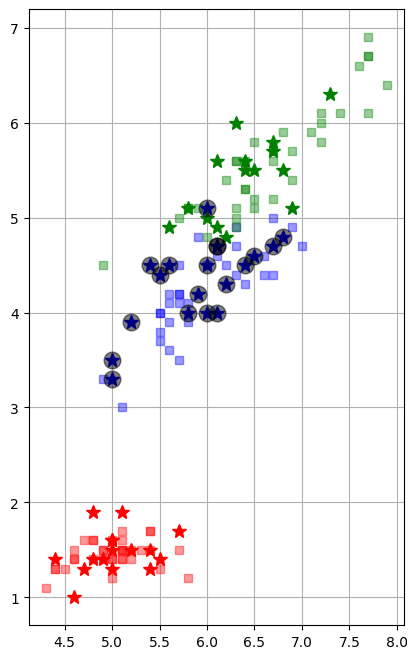

In [254]:
plt.figure(figsize=(5,8))
plt.plot(X1[y1==0,0],X1[y1==0,2],'sr', X1[y1==1,0],X1[y1==1,2],'sb', X1[y1==2,0],X1[y1==2,2],'sg', alpha=.4)
plt.plot(X2[y2==0,0],X2[y2==0,2],'*r', X2[y2==1,0],X2[y2==1,2],'*b', X2[y2==2,0],X2[y2==2,2],'*g', ms=10)
plt.plot(X2[y2!=y2e,0],X2[y2!=y2e,2],'ok',alpha=.5, ms=12)
plt.axis('scaled')
plt.grid(True)

In [255]:
dl = LogisticRegression(penalty='l2', C=0.1, solver='saga', multi_class='ovr', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste)- Classificação One versus the rest L2: ',np.sum(y2!=y2e))
print('-----------------')
print(dl.coef_)

Número de erros (teste)- Classificação One versus the rest L2:  9
-----------------
[[-0.28581298  0.31339279 -1.13423348 -0.47064741]
 [-0.12206246 -0.57513696  0.241766   -0.12369861]
 [ 0.21698152  0.02238189  0.98108914  0.60791666]]


In [256]:
dl = LogisticRegression(penalty='l2', C=0.1, solver='saga', multi_class='multinomial', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste)- Classificação Multiclasse L2: ',np.sum(y2!=y2e))
print('-----------------')
print(dl.coef_)

Número de erros (teste)- Classificação Multiclasse L2:  3
-----------------
[[-0.24203088  0.27919866 -0.99132409 -0.41026009]
 [ 0.04220047 -0.29740293  0.09386823 -0.14958252]
 [ 0.19983041  0.01820427  0.89745586  0.55984261]]


In [257]:
dl = LogisticRegression(penalty='l1', C=0.1, solver='saga', multi_class='ovr', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print('Número de erros (teste)- Classificação One versus the rest L1: ',np.sum(y2!=y2e))
print('-----------------')
print(dl.coef_)
dl = LogisticRegression(penalty='l1', C=0.1, solver='saga', multi_class='multinomial', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print('\nNúmero de erros (teste)- Classificação Multiclasse L1: ',np.sum(y2!=y2e))
print('-----------------')
print(dl.coef_)

Número de erros (teste)- Classificação One versus the rest L1:  12
-----------------
[[ 0.          0.         -1.58310773  0.        ]
 [ 0.          0.          0.05873154  0.        ]
 [ 0.          0.          1.37405219  0.        ]]

Número de erros (teste)- Classificação Multiclasse L1:  2
-----------------
[[ 0.          0.         -1.39777655  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.15808153  0.        ]]


## Máquinas de Suporte Vetorial

In [258]:
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC


### Exemplo Linear: Dados Gaussianos

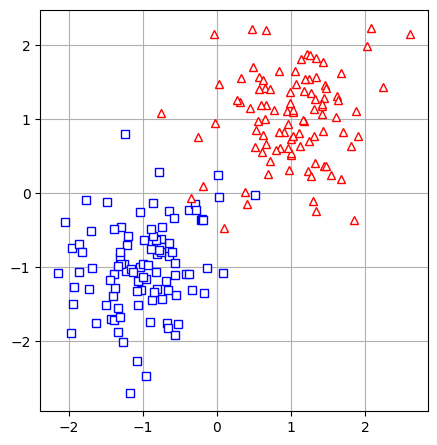

In [259]:
Nc = 100 #pontos
x1 = rnd.randn(2,Nc)*.6-1
x2 = rnd.randn(2,Nc)*.6+1
y = np.hstack((np.zeros(Nc),np.ones(Nc)))
X = np.hstack((x1,x2))
plt.figure(figsize=(5,7))
plt.plot(x1[0,:],x1[1,:],'sb',mfc='w')
plt.plot(x2[0,:],x2[1,:],'^r', mfc='w')
plt.axis('scaled')
plt.grid(True)


Número de erros LinearSVC:  5
Número de erros SVC:  5


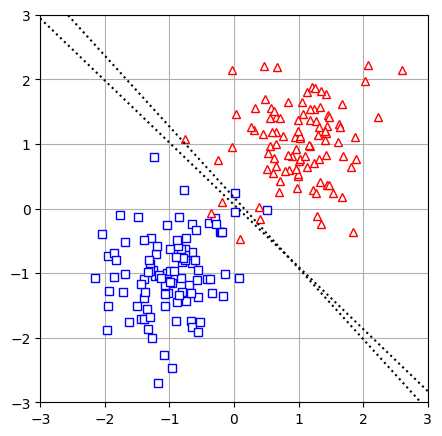

In [260]:
svm1 = LinearSVC(dual=False, C=1).fit(X.T,y)
svm2 = SVC(kernel='linear', C=1).fit(X.T,y)
y1 = svm1.predict(X.T)
y2 = svm2.predict(X.T)
print("Número de erros LinearSVC: ",np.sum(y!=y1))
print("Número de erros SVC: ",np.sum(y!=y2))

w1 = svm1.coef_.squeeze()
w2 = svm2.coef_.squeeze()
w01 = svm1.intercept_
w02 = svm2.intercept_

gx = np.array([-3,3])
gy1 = -1/w1[1]*(w1[0]*gx+w01)
gy2 = -1/w2[1]*(w2[0]*gx+w02)

plt.figure(figsize=(5,7))
plt.plot(x1[0,:],x1[1,:],'sb',mfc='w')
plt.plot(x2[0,:],x2[1,:],'^r', mfc='w')
plt.plot(gx,gy1,':k')
plt.plot(gx,gy2,':k')
plt.axis('scaled')
plt.axis([-3,3,-3,3])
plt.grid(True)

Margem de decisão

Número de erros :  5


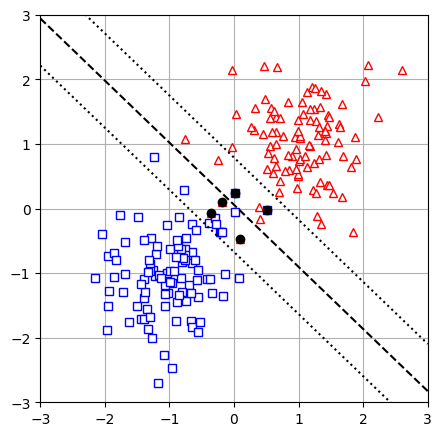

In [261]:

svm = LinearSVC(dual=False, C=1).fit(X.T,y)
ye = svm.predict(X.T)
print("Número de erros : ",np.sum(y!=ye))
w = svm.coef_.squeeze()
w0 = svm.intercept_
gx = np.array([-3,3])
gy = -1/w[1]*(w0 + w[0]*gx)

mg=1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5,7))
plt.plot(x1[0,:],x1[1,:],'sb',mfc='w')
plt.plot(x2[0,:],x2[1,:],'^r', mfc='w')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok')
plt.plot(gx,gy,'--k')
plt.plot(gx,gy1,':k')
plt.plot(gx,gy2,':k')
plt.axis('scaled')
plt.axis([-3,3,-3,3])
plt.grid(True)

Número de erros :  5


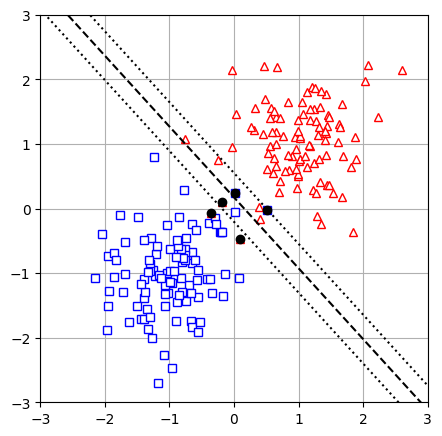

In [262]:
svm = SVC(kernel='linear', C=1).fit(X.T,y)
ye = svm.predict(X.T)
print("Número de erros : ",np.sum(y!=ye))
w = svm.coef_.squeeze()
w0 = svm.intercept_
gx = np.array([-3,3])
gy = -1/w[1]*(w0 + w[0]*gx)

mg=1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5,7))
plt.plot(x1[0,:],x1[1,:],'sb',mfc='w')
plt.plot(x2[0,:],x2[1,:],'^r', mfc='w')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok')
plt.plot(gx,gy,'--k')
plt.plot(gx,gy1,':k')
plt.plot(gx,gy2,':k')
plt.axis('scaled')
plt.axis([-3,3,-3,3])
plt.grid(True)

### Exemplo Polinomiais: Dados em Meia lua 

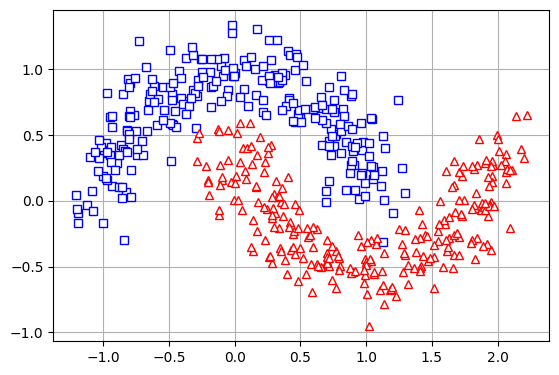

In [263]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=.15, random_state=0)
plt.plot(X[y==0,0],X[y==0,1],'sb',mfc='w')
plt.plot(X[y==1,0],X[y==1,1],'^r', mfc='w')
plt.axis('scaled')
plt.grid(True)

Nº erros: 5


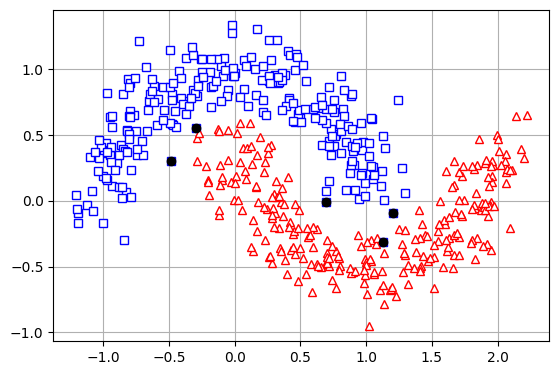

In [264]:
svm = SVC(kernel='poly',degree=3, C=10, coef0=1, gamma='auto').fit(X,y)
ye = svm.predict(X)
plt.plot(X[y==0,0],X[y==0,1],'sb',mfc='w')
plt.plot(X[y==1,0],X[y==1,1],'^r', mfc='w')
plt.plot(X[y!=ye,0],X[y!=ye,1],'ok')
print('Nº erros:',np.sum(y!=ye))
plt.axis('scaled')
plt.grid(True)

In [265]:
vs = svm.support_vectors_
print(vs.shape)
idx = svm.support_
idx[:40]

(46, 2)


array([ 45,  60,  66, 104, 111, 145, 149, 150, 154, 157, 159, 198, 211,
       248, 325, 335, 373, 381, 388, 396, 439, 440, 471, 486,   1,  11,
        12,  68,  76, 103, 128, 203, 210, 232, 243, 265, 286, 321, 349,
       353])

Nº de vetores de Suporte: 23
Nº erros: 3


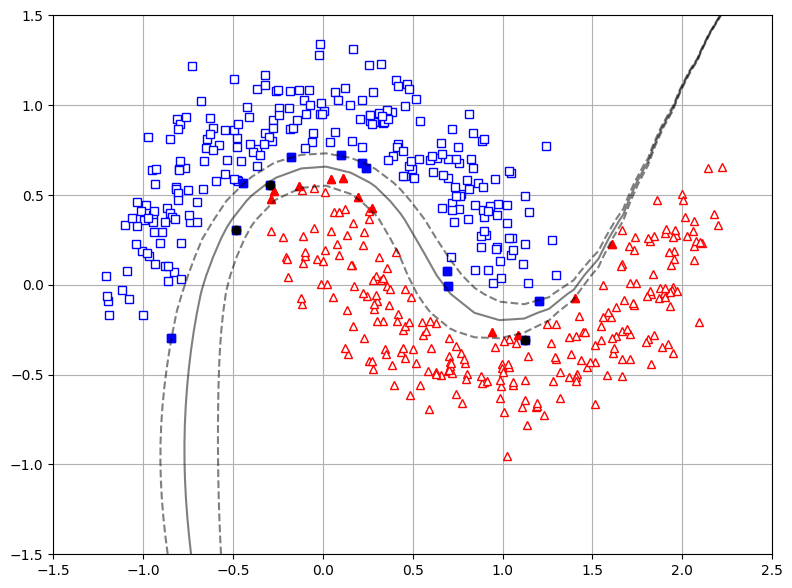

In [266]:
svm = SVC(kernel='poly',degree=9, C=1, coef0=1, gamma='auto').fit(X,y)
ye = svm.predict(X)

xx = np.linspace(-1.5, 2.5, 30)
yy = np.linspace(-1.5, 1.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy) . reshape(XX. shape)

plt.figure(figsize=(10,7))
plt.plot(X[y==0,0],X[y==0,1],'sb',mfc='w')
plt.plot(X[y==1,0],X[y==1,1],'^r', mfc='w')

vs = svm.support_vectors_
idx = svm.support_
print("Nº de vetores de Suporte:", idx.shape[0])
plt.plot(vs[y[idx]==0,0],vs[y[idx]==0,1],'sb')
plt.plot(vs[y[idx]==1,0],vs[y[idx]==1,1],'^r')

print('Nº erros:',np.sum(y!=ye))
plt.plot(X[y!=ye,0],X[y!=ye,1],'ok')

ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.axis('scaled')
plt.grid(True)

Nº de vetores de Suporte: 103
Nº erros: 15


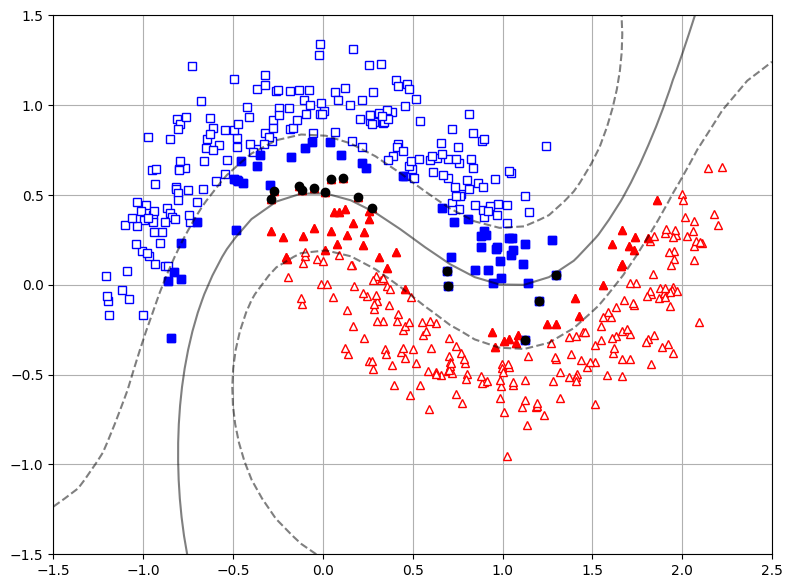

In [267]:
svm = SVC(kernel='rbf', C=1, gamma='auto').fit(X,y)
ye = svm.predict(X)

xx = np.linspace(-1.5, 2.5, 30)
yy = np.linspace(-1.5, 1.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy) . reshape(XX. shape)

plt.figure(figsize=(10,7))
plt.plot(X[y==0,0],X[y==0,1],'sb',mfc='w')
plt.plot(X[y==1,0],X[y==1,1],'^r', mfc='w')

vs = svm.support_vectors_
idx = svm.support_
print("Nº de vetores de Suporte:", idx.shape[0])
plt.plot(vs[y[idx]==0,0],vs[y[idx]==0,1],'sb')
plt.plot(vs[y[idx]==1,0],vs[y[idx]==1,1],'^r')

print('Nº erros:',np.sum(y!=ye))
plt.plot(X[y!=ye,0],X[y!=ye,1],'ok')

ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.axis('scaled')
plt.grid(True)

Nº de vetores de Suporte: 232
Nº erros: 72


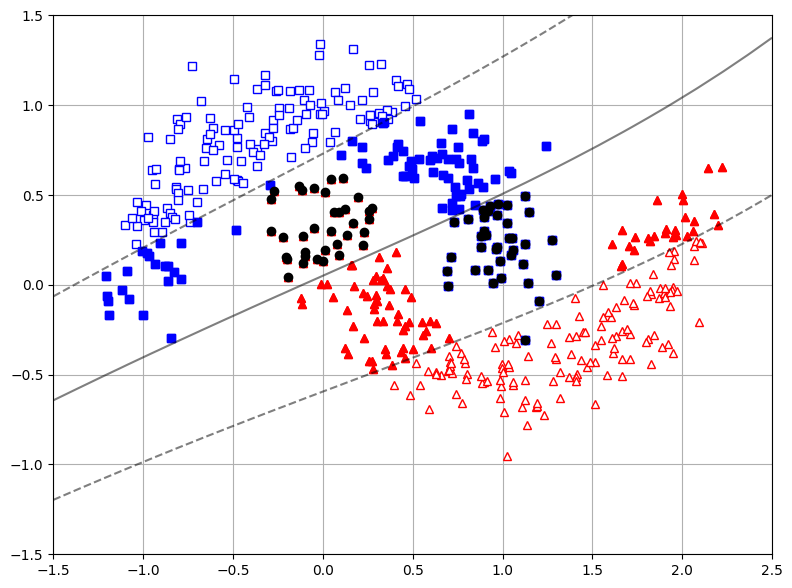

In [268]:
svm = SVC(kernel='sigmoid', C=1, gamma=.1,coef0=1).fit(X,y)
ye = svm.predict(X)

xx = np.linspace(-1.5, 2.5, 30)
yy = np.linspace(-1.5, 1.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy) . reshape(XX. shape)

plt.figure(figsize=(10,7))
plt.plot(X[y==0,0],X[y==0,1],'sb',mfc='w')
plt.plot(X[y==1,0],X[y==1,1],'^r', mfc='w')

vs = svm.support_vectors_
idx = svm.support_
print("Nº de vetores de Suporte:", idx.shape[0])
plt.plot(vs[y[idx]==0,0],vs[y[idx]==0,1],'sb')
plt.plot(vs[y[idx]==1,0],vs[y[idx]==1,1],'^r')

print('Nº erros:',np.sum(y!=ye))
plt.plot(X[y!=ye,0],X[y!=ye,1],'ok')

ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.axis('scaled')
plt.grid(True)

### Exemplo Classificação Binária: Breast Cancer

In [269]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn. svm import SVC

D=load_breast_cancer()
X=D.data
y=D.target

X1,X2,y1,y2=train_test_split(X,y,test_size=1/2,stratify=y)
svm = SVC(kernel='rbf',gamma='auto').fit(X1, y1)

print('% de acertos (treino): ',svm.score(X1,y1))
print('% de acertos (teste): ',svm.score(X2,y2))

% de acertos (treino):  1.0
% de acertos (teste):  0.6280701754385964


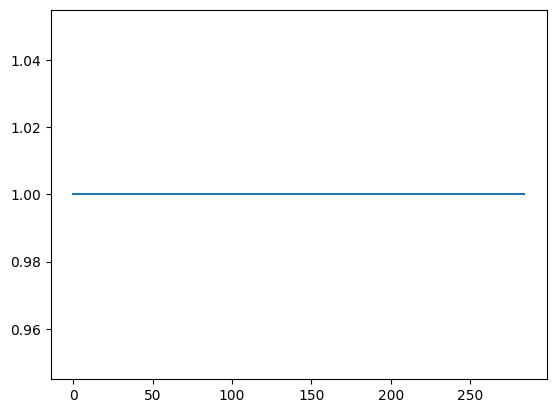

In [270]:
plt.plot(svm.predict(X2))

Comentários
O SVM é muito sensivvel a transformação de dados e por isso como podemos observar no gráfico de cima é a classificar todos os dados numa só classe

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X1)
X1n = scaler.transform(X1)
X2n = scaler.transform(X2)

svm = SVC(kernel='rbf',gamma='auto').fit(X1n, y1)

print('% de acertos (treino): ',svm.score(X1n,y1))
print('% de acertos (teste): ',svm.score(X2n,y2))

% de acertos (treino):  0.9859154929577465
% de acertos (teste):  0.968421052631579


## Ajuste de Parâmetros de modelo


In [272]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [273]:
D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X,y,test_size=1/2,stratify=y)

scaler = StandardScaler().fit(X1)
X1n = scaler.transform(X1)
X2n = scaler.transform(X2)

topScore = 0
gList = [0.0001,0.001,0.01,0.1,1]
cList = [0.1,1,10,50,100,150,200]
for c in cList:
    for g in gList:
        svm = SVC(kernel='rbf',gamma=g,C=c).fit(X1n, y1)
        score = svm.score(X2n,y2)
        if(score > topScore):
            topScore = score
            par = (g,c)

svm = SVC(kernel='rbf',gamma=par[0],C=par[1]).fit(X1n, y1)
print('% de acertos treino: ',svm.score(X1n,y1))
print('% de acertos teste: ',svm.score(X2n,y2))
print('Parametros: gamma=%.4f, C=%.1f'%(par[0],par[1]))

% de acertos treino:  0.9859154929577465
% de acertos teste:  0.9719298245614035
Parametros: gamma=0.0001, C=200.0


Conjunto de validação

In [275]:
D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X,y,test_size=1/3,stratify=y)

scaler = StandardScaler().fit(X1)
X1n = scaler.transform(X1)
X2n = scaler.transform(X2)

X1na,X1nb,y1a,y1b = train_test_split(X1n,y1,test_size=1/2,stratify=y1)

topScore = 0
gList = [0.0001,0.001,0.01,0.1,1]
cList = [0.1,1,10,50,100,150,200]
for c in cList:
    for g in gList:
        svm = SVC(kernel='rbf',gamma=g,C=c).fit(X1na, y1a)
        score = svm.score(X1nb,y1b)
        if(score > topScore):
            topScore = score
            par = (g,c)

svm = SVC(kernel='rbf',gamma=par[0],C=par[1]).fit(X1n, y1)
print('% de acertos treino: ',svm.score(X1n,y1))
print('% de acertos validação: ',topScore)
print('% de acertos teste: ',svm.score(X2n,y2))
print('Parametros: gamma=%.4f, C=%.1f'%(par[0],par[1]))

% de acertos treino:  0.9841688654353562
% de acertos validação:  0.9789473684210527
% de acertos teste:  0.9842105263157894
Parametros: gamma=0.0010, C=50.0


Ajustes de Parametros com validação cruzada

In [277]:
from sklearn.model_selection import cross_val_score
D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X,y,test_size=1/4,stratify=y)

scaler = StandardScaler().fit(X1)
X1n = scaler.transform(X1)
X2n = scaler.transform(X2)

topScore = 0
gList = [0.0001,0.001,0.01,0.1,1]
cList = [0.1,1,10,50,100,150,200]
for c in cList:
    for g in gList:
        svm = SVC(kernel='rbf',gamma=g,C=c)
        scores = cross_val_score(svm, X1n, y1, cv=5)
        if np.mean(scores) >= topScore:
            topScore = np.mean(scores)
            par = (g,c)

svm = SVC(kernel='rbf',gamma=par[0],C=par[1]).fit(X1n, y1)
print('% de acertos treino: ',svm.score(X1n,y1))
print('% de acertos validação: ',topScore)
print('% de acertos teste: ',svm.score(X2n,y2))
print('Parametros: gamma=%.4f, C=%.1f'%(par[0],par[1]))

% de acertos treino:  0.9859154929577465
% de acertos validação:  0.9765526675786594
% de acertos teste:  0.9790209790209791
Parametros: gamma=0.0010, C=200.0


Ajustes de Parametros com a função GridSearchCV

In [278]:
from sklearn.model_selection import GridSearchCV

D = load_breast_cancer()
X = D.data
y = D.target

X1,X2,y1,y2 = train_test_split(X,y,test_size=1/4,stratify=y)

scaler = StandardScaler().fit(X1)
X1n = scaler.transform(X1)
X2n = scaler.transform(X2)

gList = [0.0001,0.001,0.01,0.1,1]
cList = [0.1,1,10,50,100,150,200]
grelha = {'gamma':gList,'C':cList}

gSearch = GridSearchCV(SVC(kernel='rbf'),param_grid=grelha,cv=5).fit(X1n,y1)
svm = gSearch.best_estimator_
par = gSearch.best_params_

print('% de acertos treino: ',svm.score(X1n,y1))
print('% de acertos teste: ',svm.score(X2n,y2))
print('Parametros: gamma=%.4f, C=%.1f'%(par['gamma'],par['C']))

% de acertos treino:  0.9882629107981221
% de acertos teste:  0.986013986013986
Parametros: gamma=0.0100, C=10.0


GridSearchCV com Validação Cruzada

In [279]:
from sklearn.model_selection import GridSearchCV

D = load_breast_cancer()
X = D.data
y = D.target

scaler = StandardScaler().fit(X)
Xn = scaler.transform(X)

gList = [0.0001,0.001,0.01,0.1,1]
cList = [0.1,1,10,50,100,150,200]
grelha = {'gamma':gList,'C':cList}

gSearch = GridSearchCV(SVC(kernel='rbf'),param_grid=grelha,cv=5)
scores = cross_val_score(gSearch, Xn, y, cv=5)

print('Scores: ',scores)
print('Média: ',np.mean(scores))

Scores:  [0.97368421 0.97368421 0.98245614 0.96491228 0.99115044]
Média:  0.9771774569166277
